In [16]:
import pandas as pd
df = pd.read_pickle('training_set.pkl')
df.head()

,idWlb,FM,S
0,82.0,82.0,95
1,82.0,82.0,95
2,82.0,82.0,95
3,82.0,82.0,95
4,82.0,82.0,95


In [17]:
import numpy as np

In [88]:
wells = [well for well in df.idWlb.drop_duplicates()]
print(wells.index(107))


2


In [64]:
# sym_seq_by_formation  = df.groupby(['idWlb','FM'])
#123 103
segments = []
aggregates = []

for fm in df.FM.drop_duplicates():
    formations = []
    bulk = np.array([])
    for well in df.idWlb.drop_duplicates():
        formation = df.loc[(df.idWlb==well) & (df.FM==fm)]
        bulk = np.append(bulk, formation.S.values)
        formations.append(formation)
    segments.append(formations)
    aggregates.append(bulk)
print(len(segments))

9


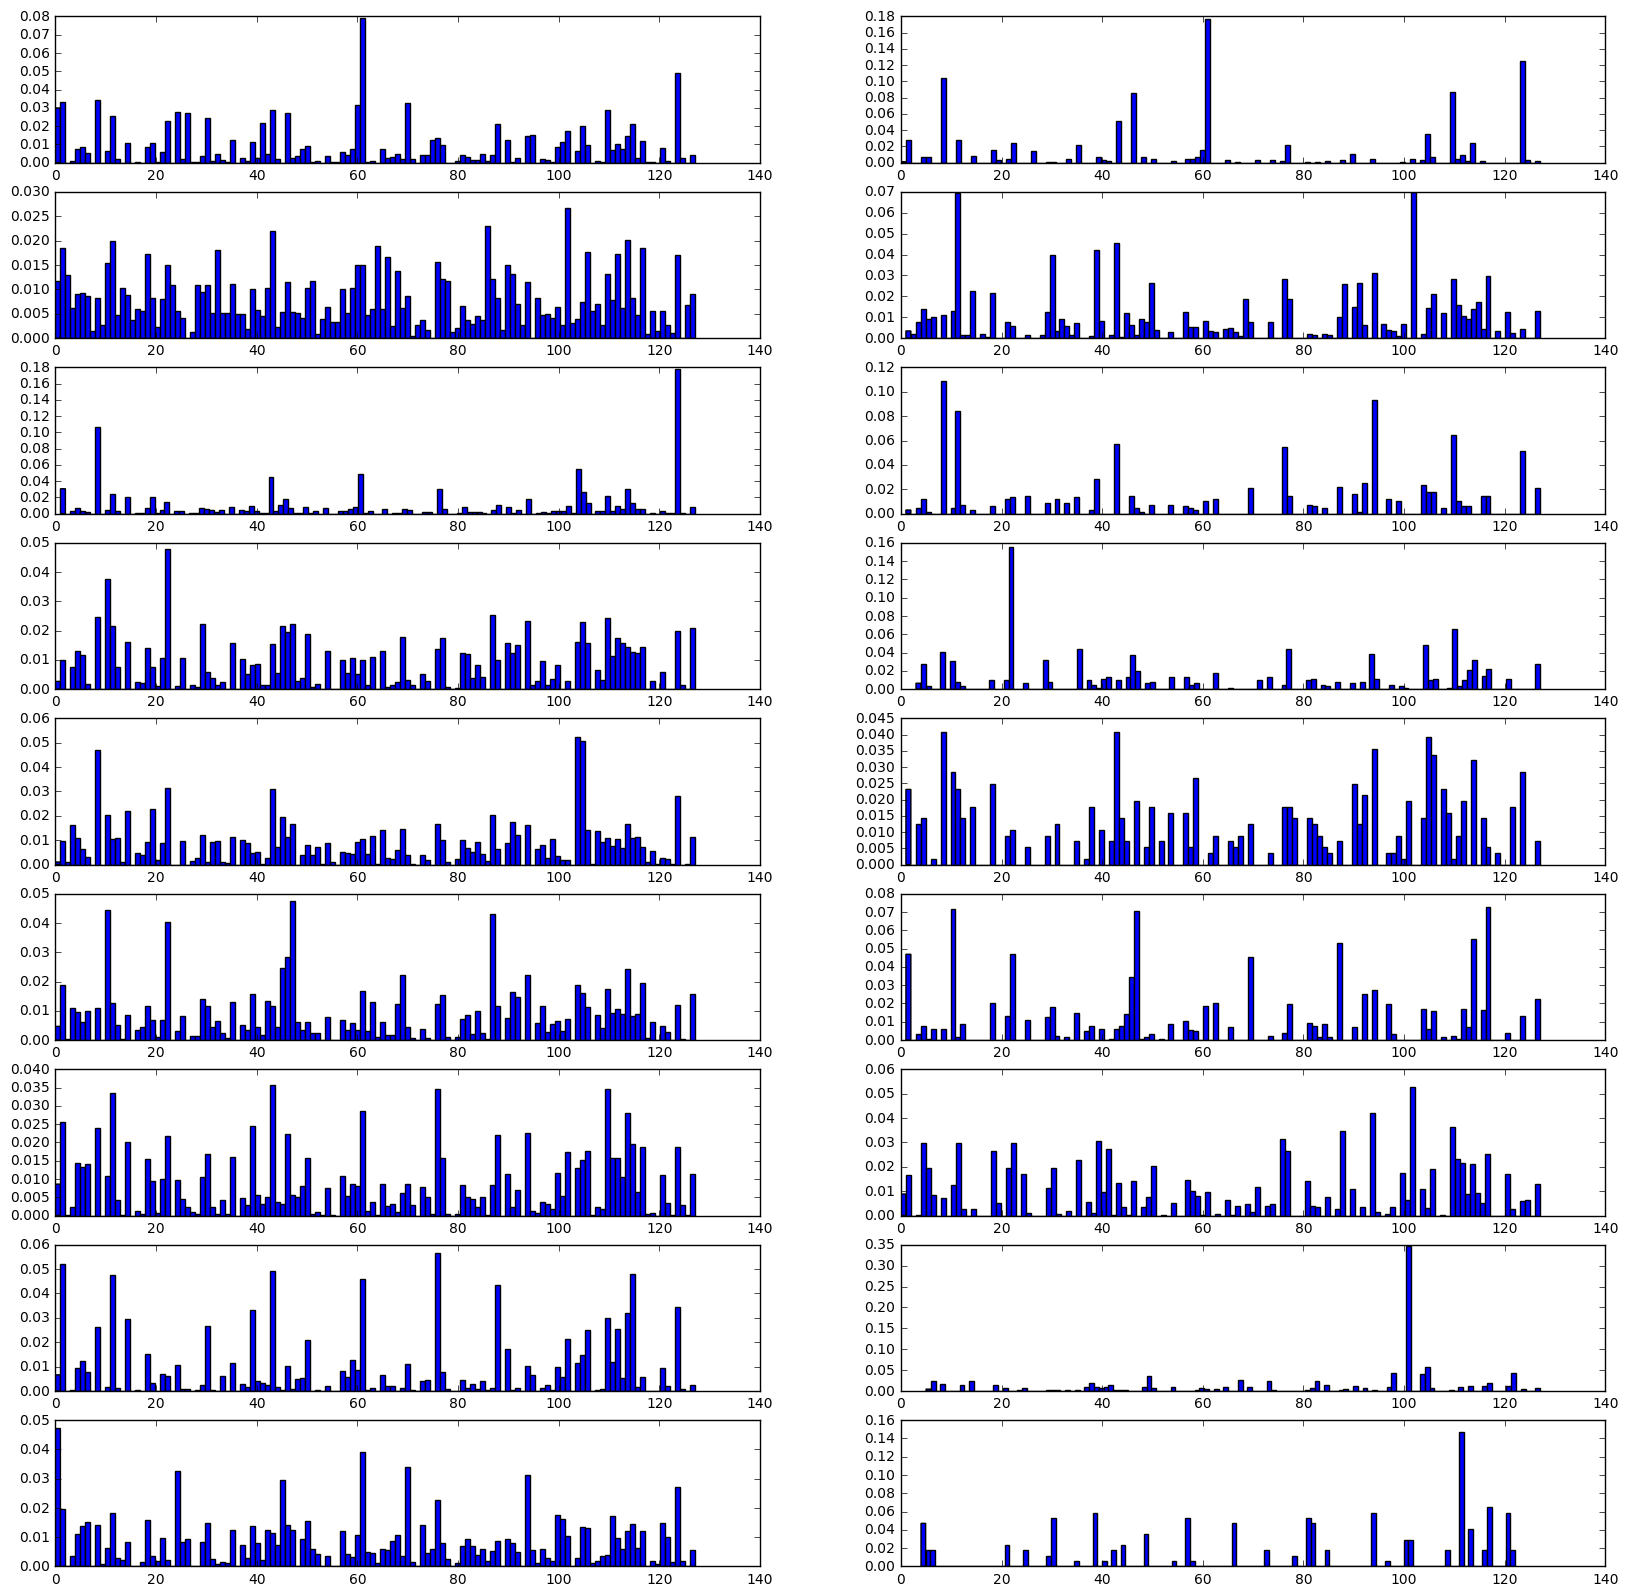

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt

agg_im = np.zeros((128,9))
plt.figure(figsize=(20,20))
maxes = []
for i, agg in enumerate(aggregates):
    plt.subplot(9, 2, 2*i+1)
    plt.hist(agg, 128, normed=True)
    maxes.append(np.amax(np.histogram(agg, 128)[0]))
    agg_im[:,i] = np.histogram(agg, 128)[0]
    
im_107 = np.zeros((128,9))
for i, segment in enumerate(segments):
    ax = plt.subplot(9, 2, 2*i+2)
#     print((segment[4].S.values))
    ax.hist(segment[4].S.values, 128, normed=True)
    im_107[:,i] = np.histogram(segment[4].S.values, 128)[0]

plt.savefig('histgrams_agg_123.png')

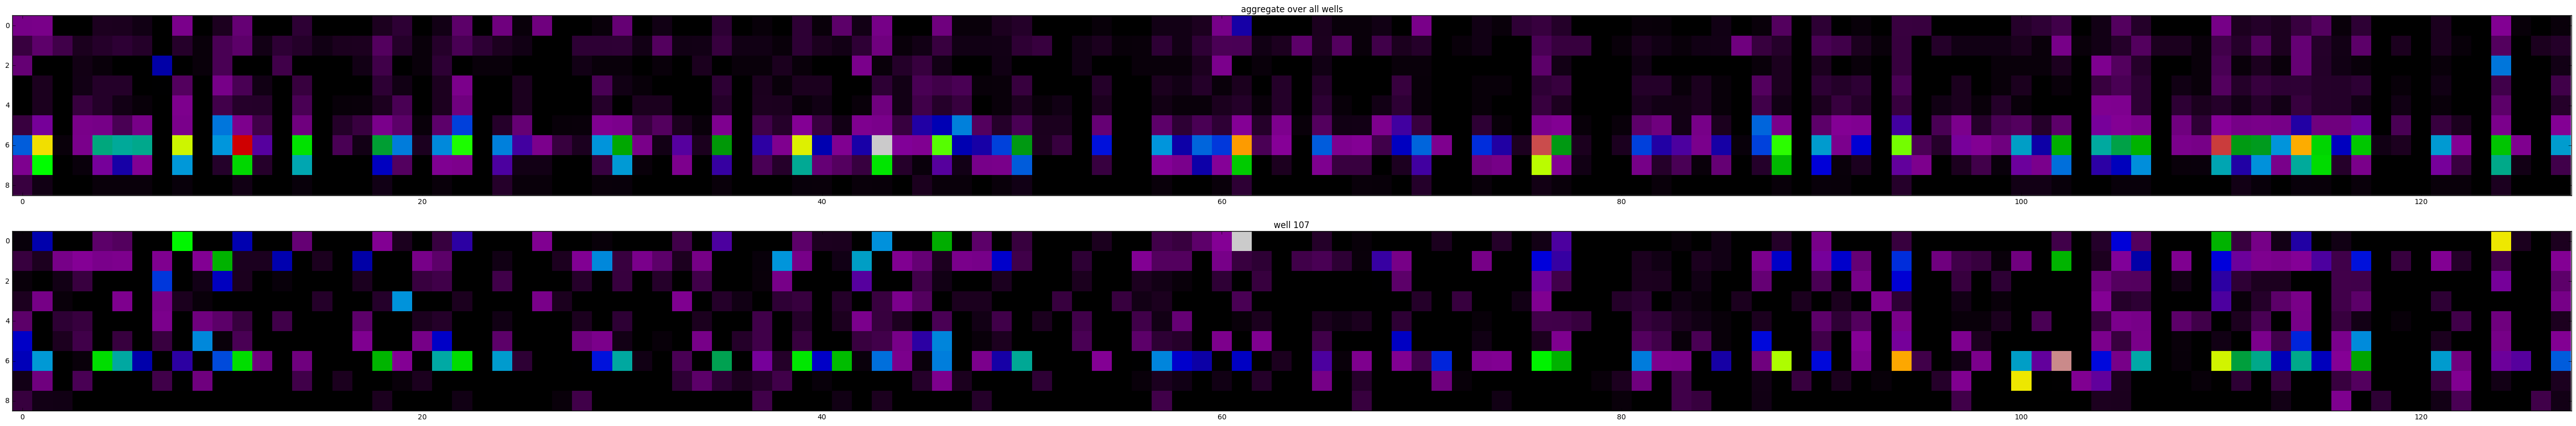

In [117]:
plt.figure(figsize=(100,10))
plt.subplot(2,1,1)
plt.imshow(agg_im.T, cmap='nipy_spectral', interpolation='none')
plt.title('aggregate over all wells')
plt.subplot(2,1,2)
plt.imshow(im_107.T, cmap='nipy_spectral', interpolation='none')
plt.title('well 107')
plt.savefig('dna_agg_123.png')